In [4]:
!pip install tensorflow_hub

!pip install pandas

!pip install tensorflow_text

!pip install matplotlib

!pip install sklearn

!pip install tensorflow

!pip install numpy

!pip install random

In [ ]:
import tensorflow_hub as hub

import pandas as pd

import tensorflow_text as text

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf

import numpy as np

import random

In [2]:
#loading dataset


data=pd.read_csv('spam.csv')

In [3]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data[data['Category']=='spam']

,Category,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [5]:
data[data['Category']=='ham']

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...
...,...,...
5565,ham,Huh y lei...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
pd.value_counts(data['Category'])

ham     4825
spam     747
Name: Category, dtype: int64

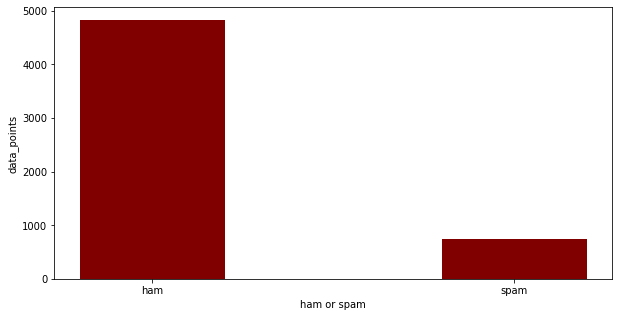

In [7]:
d=dict(pd.value_counts(data['Category']))

type_ = list(d.keys())
count = list(d.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(type_, count, color ='maroon',
        width = 0.4)
 
plt.xlabel("ham or spam")
plt.ylabel("data_points")
plt.show()

In [8]:
df_ham=data[data['Category']=='ham']
df_spam=data[data['Category']=='spam']

In [9]:
##downsampling data

In [26]:
df_ham_downsampled=df_ham.sample(len(df_spam))

In [27]:
#concate data and converting into unbiaed data

In [28]:
df_balanced = pd.concat([df_spam , df_ham_downsampled])

In [33]:
df_balanced=df_balanced.sort_index()

In [34]:
pd.value_counts(df_balanced['Category'])

spam    747
ham     747
Name: Category, dtype: int64

In [35]:
df_balanced['spam'] = df_balanced['Category'].apply(lambda x:1 if x=='spam' else 0)

In [36]:
#splitiong data

In [37]:
X_train, X_test , y_train, y_test = train_test_split(df_balanced['Message'], df_balanced['spam'],test_size=0.2)

In [38]:
bert_preprocessor = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')
bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')

2022-07-06 07:18:00.148028: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-07-06 07:18:00.148085: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (aaravcompute): /proc/driver/nvidia/version does not exist
2022-07-06 07:18:00.149742: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [39]:
text_input = tf.keras.layers.Input(shape = (), dtype = tf.string, name = 'Inputs')
preprocessed_text = bert_preprocessor(text_input)
embeed = bert_encoder(preprocessed_text)
dropout = tf.keras.layers.Dropout(0.1, name = 'Dropout')(embeed['pooled_output'])
outputs = tf.keras.layers.Dense(1, activation = 'sigmoid', name = 'Dense')(dropout)

In [40]:
model = tf.keras.Model(inputs = [text_input], outputs = [outputs])

In [41]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Inputs (InputLayer)            [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['Inputs[0][0]']                 
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [42]:
Metrics = [tf.keras.metrics.BinaryAccuracy(name = 'accuracy'),
           tf.keras.metrics.Precision(name = 'precision'),
           tf.keras.metrics.Recall(name = 'recall')
           ]

In [43]:
# compiling our model
model.compile(optimizer ='adam',
               loss = 'binary_crossentropy',
               metrics = Metrics)

In [44]:
history = model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
38/38 [==============================] - 340s 9s/step - loss: 0.6587 - accuracy: 0.6067 - precision: 0.6047 - recall: 0.6067
Epoch 2/10
38/38 [==============================] - 331s 9s/step - loss: 0.5180 - accuracy: 0.8226 - precision: 0.8134 - recall: 0.8353
Epoch 3/10
38/38 [==============================] - 335s 9s/step - loss: 0.4519 - accuracy: 0.8444 - precision: 0.8304 - recall: 0.8639
Epoch 4/10
38/38 [==============================] - 336s 9s/step - loss: 0.3989 - accuracy: 0.8695 - precision: 0.8501 - recall: 0.8958
Epoch 5/10
38/38 [==============================] - 334s 9s/step - loss: 0.3703 - accuracy: 0.8954 - precision: 0.8778 - recall: 0.9176
Epoch 6/10
38/38 [==============================] - 334s 9s/step - loss: 0.3396 - accuracy: 0.8904 - precision: 0.8803 - recall: 0.9025
Epoch 7/10
38/38 [==============================] - 333s 9s/step - loss: 0.3265 - accuracy: 0.8962 - precision: 0.8905 - recall: 0.9025
Epoch 8/10
38/38 [==============================

In [45]:
# Evaluating performance
model.evaluate(X_test,y_test)

10/10 [==============================] - 87s 9s/step - loss: 0.2696 - accuracy: 0.9030 - precision: 0.9020 - recall: 0.9079


[0.2695539593696594,
 0.9030100107192993,
 0.9019607901573181,
 0.9078947305679321]

In [46]:
# getting y_pred by predicting over X_text and flattening it
y_pred = model.predict(X_test)
y_pred = y_pred.flatten() # require to be in one-dimensional array , for easy manipulation

10/10 [==============================] - 87s 9s/step


In [48]:
import os
keras_path=os.path.join('','model_save')
os.makedirs(keras_path,exist_ok=True)

model.save(os.path.join(keras_path,'full_model_email.h5'))

In [50]:
#-to save pickle file -->
import joblib
joblib.dump(model, 'email_spam.pkl')

INFO:tensorflow:Assets written to: ram://83798029-8fd0-4081-ade7-8ec25f47915b/assets


INFO:tensorflow:Assets written to: ram://83798029-8fd0-4081-ade7-8ec25f47915b/assets


['email_spam.pkl']

In [54]:
from azureml.core import Workspace
from azureml.core import Model
from azureml.core.resource_configuration import ResourceConfiguration

ws = Workspace.from_config()

model = Model.register(workspace=ws,
                       model_name='model',                # Name of the registered model in your workspace.
                       model_path='./email_spam.pkl',  # Local file to upload and register as a model.
                       model_framework=tf,  # Framework used to create the model.
                       model_framework_version=tf.__version__,  # Version of scikit-learn used to create the model.
                       resource_configuration=ResourceConfiguration(cpu=8, memory_in_gb=16),
                       description='email spam deticstion using bert',
                       tags={'area': 'email', 'type': 'tensorflow'})

print('Name:', model.name)
print('Version:', model.version)

Registering model model
Name: model
Version: 1
